# Introduction

Natural Language Processing (NLP): The discipline of computer science, artificial intelligence and linguistics that is concerned with the creation of computational models that process and understand natural language. These include: making the computer understand the semantic grouping of words (e.g. cat and dog are semantically more similar than cat and spoon), text to speech, language translation and many more

Sentiment Analysis: It is the interpretation and classification of emotions (positive, negative and neutral) within text data using text analysis techniques. Sentiment analysis allows organizations to identify public sentiment towards certain words or topics.

In this notebook, we'll develop a Sentiment Analysis model to categorize a text as Positive or Negative or Neutral

# Importing Dependencies

In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [110]:
df = pd.read_csv('E:/Dataset for intership_AI/Text_sentimental_Analysis/train.csv',
                 delimiter=',', encoding='ISO-8859-1')
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


# Data Cleaning 

In [111]:
#remove the missing values

df=df.dropna()

In [112]:
#Select require columns
df = df[['sentiment','text']]

In [113]:
#columns
df.columns

Index(['sentiment', 'text'], dtype='object')

In [114]:
df.sentiment.value_counts()


neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [115]:
df['sentiment'] = df['sentiment'].replace({4:1})

In [116]:

df['sentiment']

0         neutral
1        negative
2        negative
3        negative
4        negative
           ...   
27476    negative
27477    negative
27478    positive
27479    positive
27480     neutral
Name: sentiment, Length: 27480, dtype: object

In [117]:
#Check missing values in the dataset

df.isna().sum().sum()

0

In [118]:
#after data cleaning

df = df[['text','sentiment']]
df

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
...,...,...
27476,wish we could come see u on Denver husband l...,negative
27477,I`ve wondered about rake to. The client has ...,negative
27478,Yay good for both of you. Enjoy the break - y...,positive
27479,But it was worth it ****.,positive


# Preprocessing


Text Preprocessing is traditionally an important step for Natural Language Processing (NLP) tasks. It transforms text into a more digestible form so that machine learning algorithms can perform better.

The Preprocessing steps taken are:

1.Lower Casing: Each text is converted to lowercase.
2.Replacing URLs: Links starting with "http" or "https" or "www" are replaced by "URL".
3.Replacing Emojis: Replace emojis by using a pre-defined dictionary containing emojis along with their meaning. (eg: ":)" to "EMOJIsmile")
4.Replacing Usernames: Replace @Usernames with word "USER". (eg: "@Kaggle" to "USER")
5.Removing Non-Alphabets: Replacing characters except Digits and Alphabets with a space.
6.Removing Consecutive letters: 3 or more consecutive letters are replaced by 2 letters. (eg: "Heyyyy" to "Heyy")
7.Removing Short Words: Words with length less than 2 are removed.
8.Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
9.Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “Great” to “Good”)

In [119]:
## remove stopwords and punctuation marks
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()

corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


In [120]:
%%time
final_corpus = []
final_corpus_joined = []
for i in df.index:

    text = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    #Convert to lowercase
    text = text.lower()
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    ##Convert to list from string
    text = text.split()

    #Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text 
            if not word in stuff_to_be_removed] 
    text1 = " ".join(text)
    final_corpus.append(text)
    final_corpus_joined.append(text1)

CPU times: total: 2.7 s
Wall time: 2.88 s


In [121]:
data_cleaned = pd.DataFrame()
data_cleaned["text"] = final_corpus_joined
data_cleaned["sentiment"] = df["sentiment"].values

In [122]:
data_cleaned['sentiment'].value_counts()


neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [123]:
data_cleaned.head()

,text,sentiment
0,responded going,neutral
1,sooo sad miss san diego,negative
2,bos bullying,negative
3,interview leave alone,negative
4,son put release already bought,negative


In [124]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"[responded, going]",neutral
1,"[sooo, sad, miss, san, diego]",negative
2,"[bos, bullying]",negative
3,"[interview, leave, alone]",negative
4,"[son, put, release, already, bought]",negative


# Exploratory Data Analysis (EDA)

Perform Exploratory Data Analysis (EDA) to gain insights from the dataset. Firstly, visualize word frequency using bar charts or histograms to identify common words and potential stop words. Next, if applicable, analyze sentiment distribution through histograms or pie charts to understand the sentiment balance. Lastly, create word clouds to depict prominent words based on their frequency. Preprocess the text data before conducting EDA by tokenizing, lowercasing, and removing punctuation.

## Word Frequency

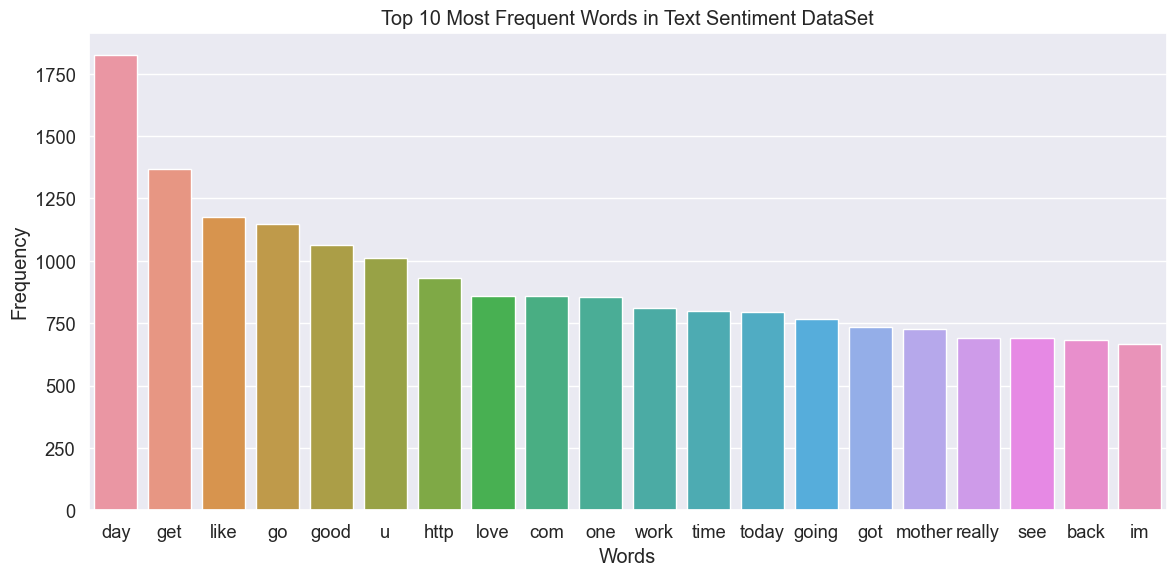

In [125]:
from wordcloud import WordCloud
from collections import Counter
# Combining the Text data for analysis
combine_text =''.join([' '.join(text_list) for text_list in data_eda['text']])

# Calculate word frequencies
words = combine_text.split()
word_freq = Counter(words)

# Coverting word frequecies into DataFrame for Visualizations 
word_freq = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
p = word_freq.sort_values(by='Frequency',ascending=False)
Word=p['Word']
frequency=p['Frequency']

# Create a bar plot of word frequencies
plt.figure(figsize=(12,6))
sns.barplot(x=(Word.head(20)), y=(frequency.head(20))).set(title=f'Top 10 Most Frequent Words in Text Sentiment DataSet')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# one words in positive data

In [126]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    return(dic)
count_corpus = get_count(positive_list)

In [127]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

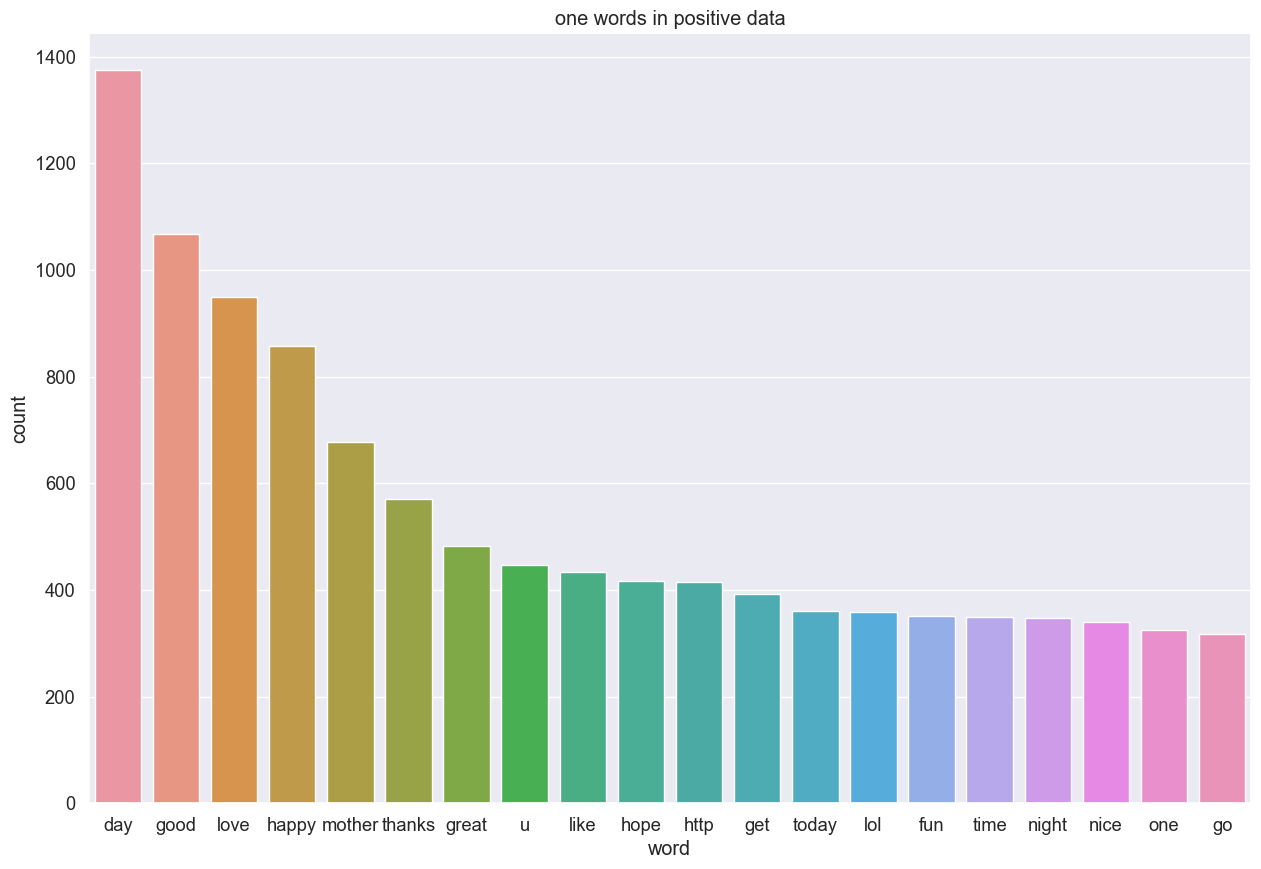

In [128]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in positive data')
plt.show()

# one words in negative data

In [129]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(negative_list)

In [130]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

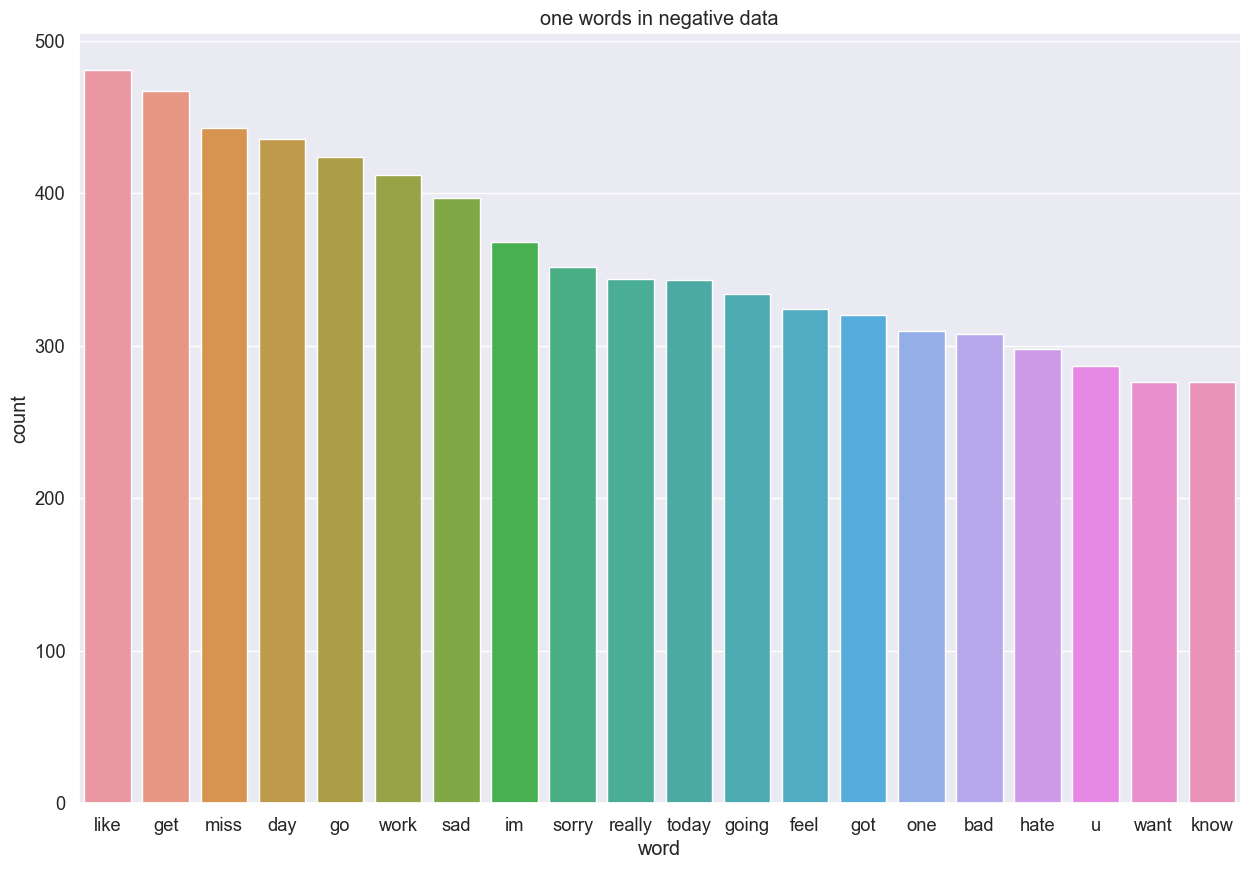

In [131]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in negative data')
plt.show()

# one words in neutral data

In [132]:
def get_count(data):
    dic = {}
    for i in data:
        for j in i:
            if j not in dic:
                dic[j]=1
            else:
                dic[j]+=1    
            
    #dic = dict(sorted(dic.items() , key = lambda x:x[1],reverse=True))
    return(dic)
count_corpus = get_count(neutral_list)

In [133]:
count_corpus = pd.DataFrame({"word":count_corpus.keys(),"count":count_corpus.values()})
count_corpus = count_corpus.sort_values(by = "count", ascending = False)

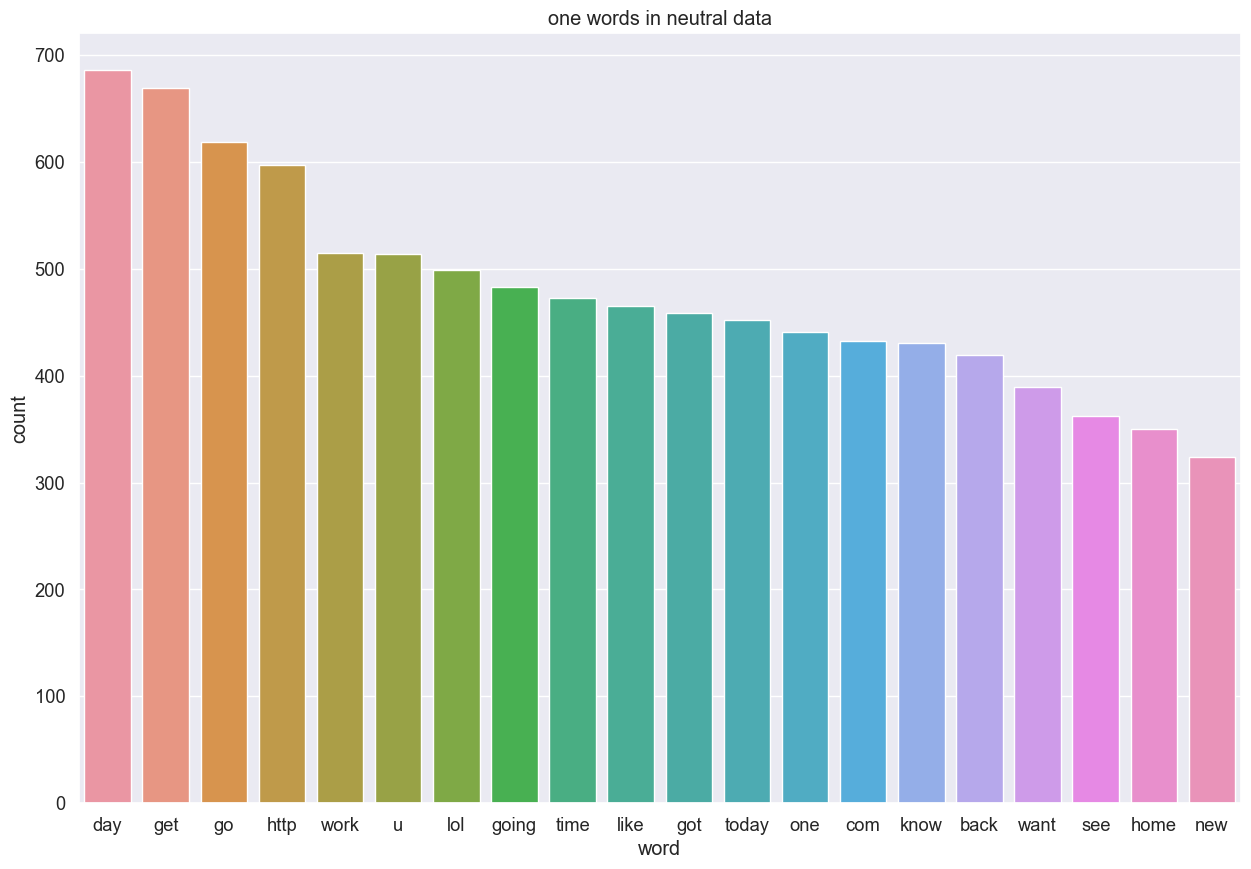

In [134]:
import seaborn as sns
plt.figure(figsize = (15,10))
sns.barplot(x = count_corpus["word"][:20], y = count_corpus["count"][:20])
plt.title('one words in neutral data')
plt.show()

# Sentiment Distribution

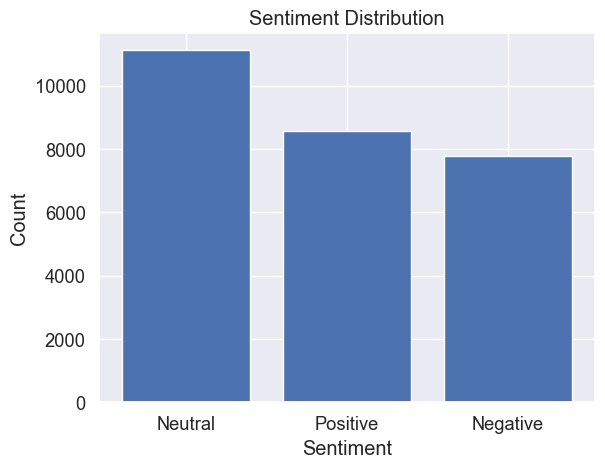

In [135]:
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Adding labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

# Adding x-axis labels
plt.xticks(sentiment_counts.index, ['Neutral', 'Positive', 'Negative'])

# Display the plot
plt.show()


[Text(0.5, 1.0, 'Sentiments Used In Text Sentiment DataSet')]

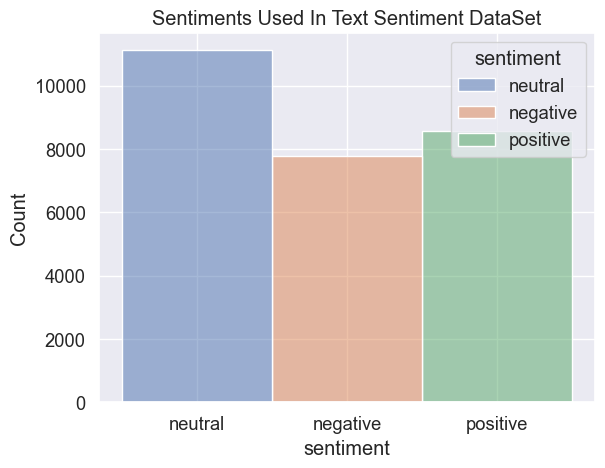

In [136]:
# Visualising the Sentiment Data

sns.histplot(data = data_eda, x = data_eda['sentiment'], hue = 'sentiment').set(title=f'Sentiments Used In Text Sentiment DataSet')

<Axes: xlabel='sentiment', ylabel='Count'>

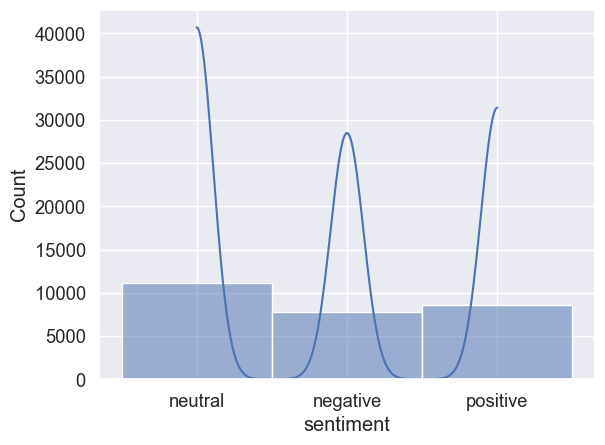

In [137]:
sns.histplot(df['sentiment'],kde=True)

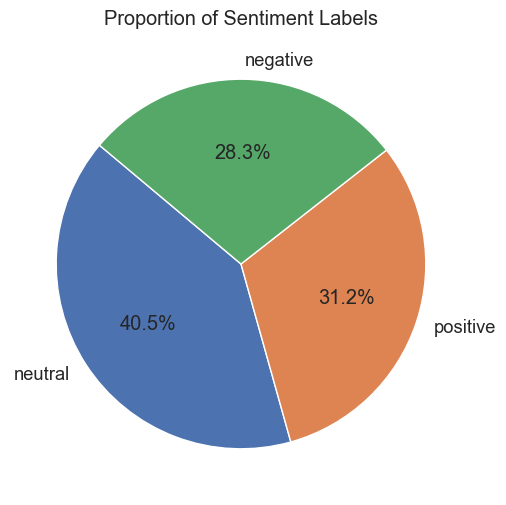

In [138]:
# Create a pie chart to show the proportion of each sentiment label

sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Sentiment Labels')
plt.show()

# WordClouds 

In [139]:
# Storing positive data seperately
positive = data_eda[data_eda['sentiment'] == 'positive']
positive_list = positive['text'].tolist()

# Storing negative data seperately

negative = data_eda[data_eda['sentiment'] == 'negative']
negative_list = negative['text'].tolist()

# Storing neutral data seperately

neutral = data_eda[data_eda['sentiment'] == 'neutral']
neutral_list = neutral['text'].tolist()

In [140]:
positive_all = " ".join([word for sent in positive_list for word in sent ])
negative_all = " ".join([word for sent in negative_list for word in sent ])
neutral_all = " ".join([word for sent in neutral_list for word in sent ])

# WordCloud for Positive Texts

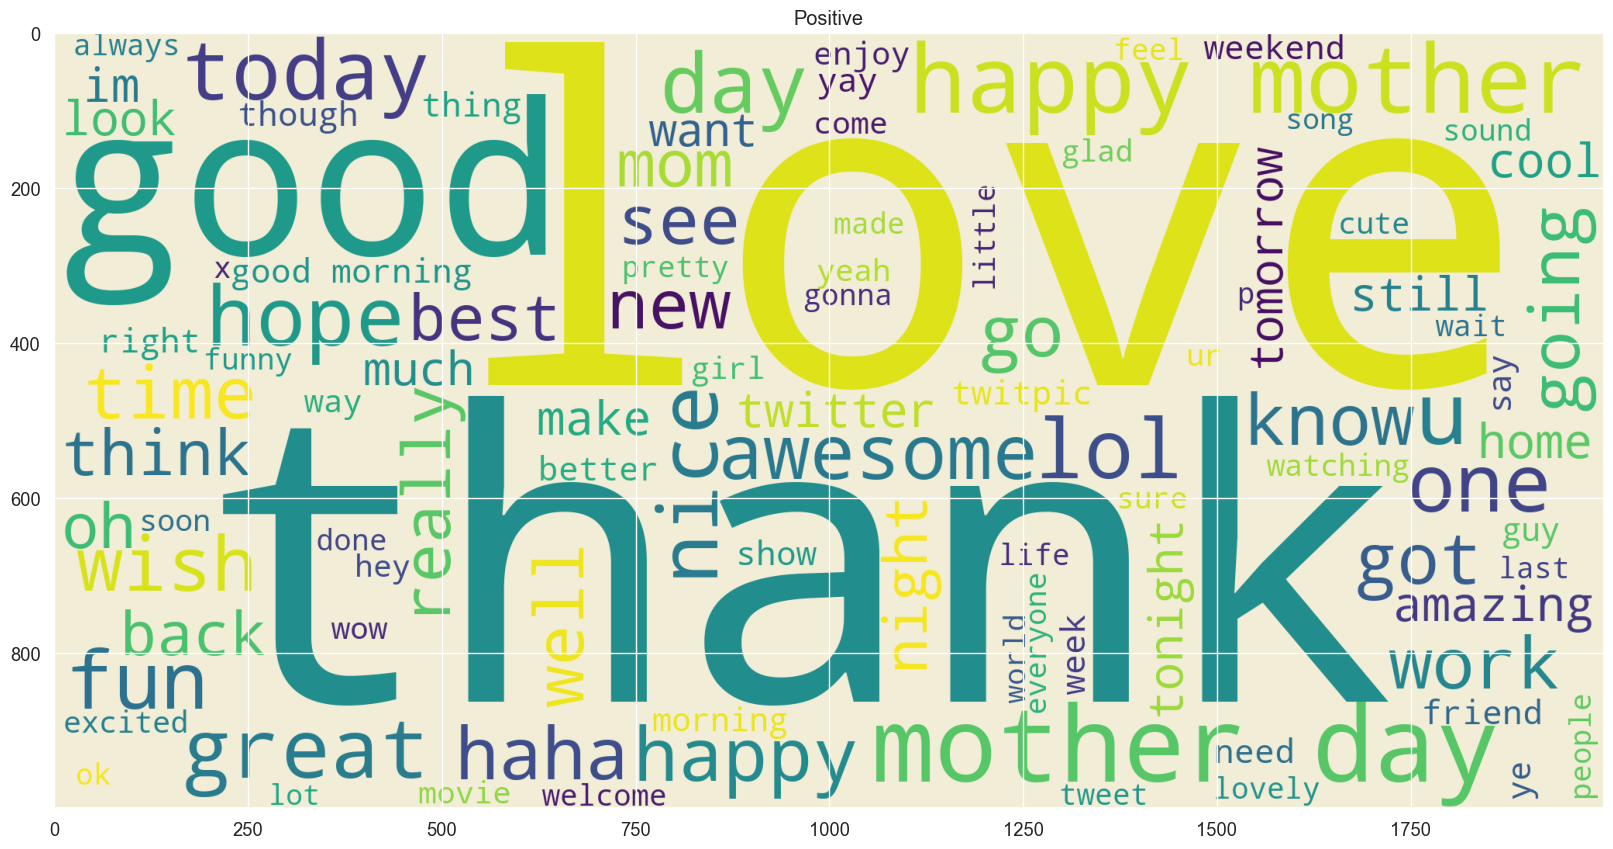

In [141]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

# WordCloud for Negative Texts

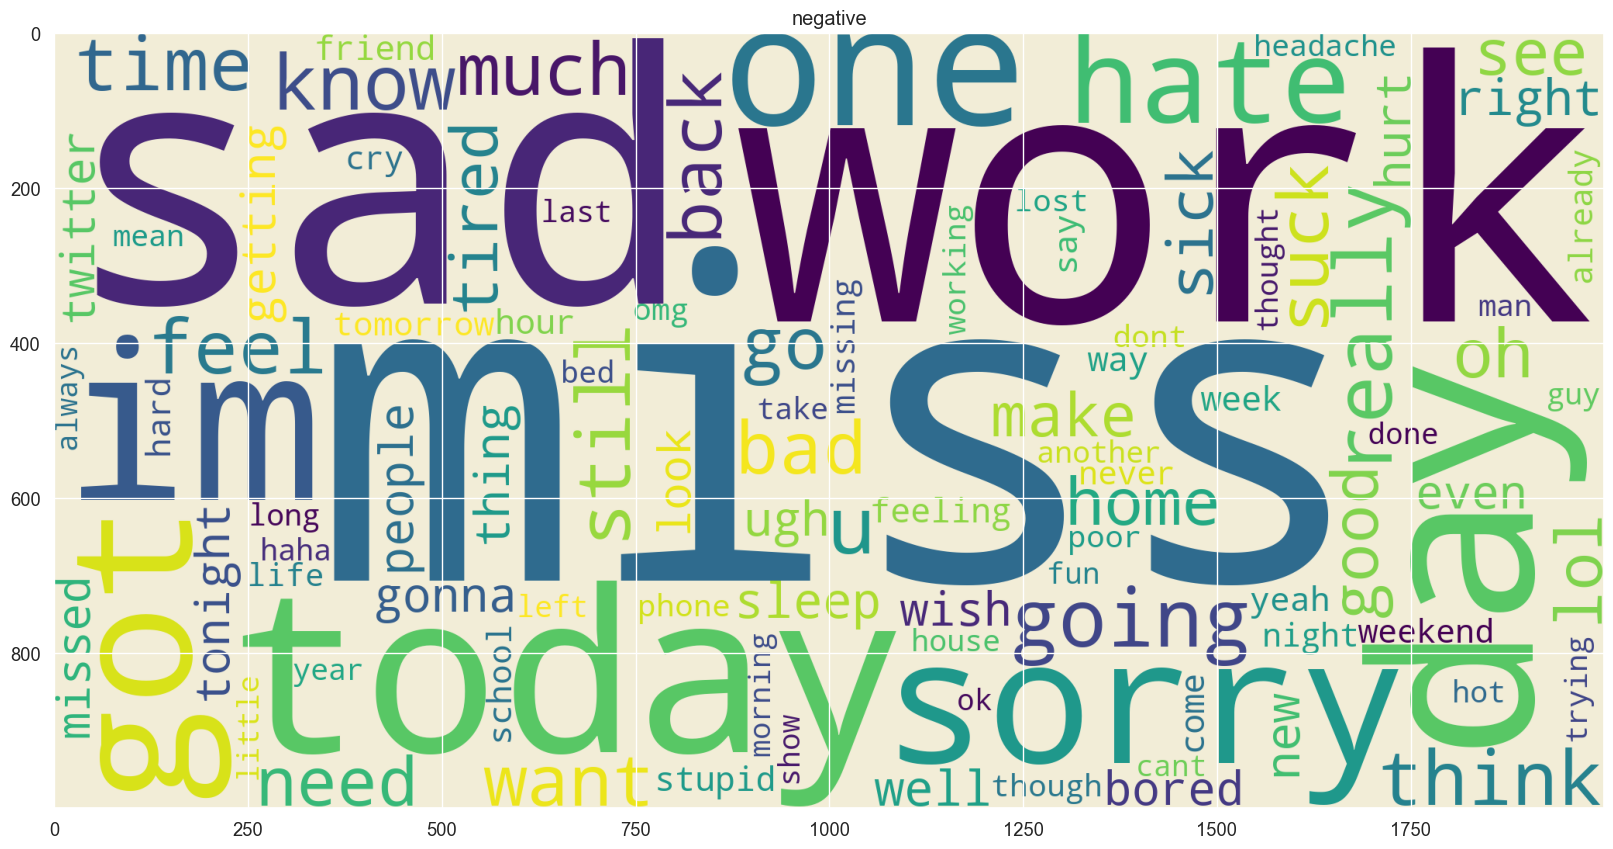

In [142]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# WordCloud for Neutral Texts

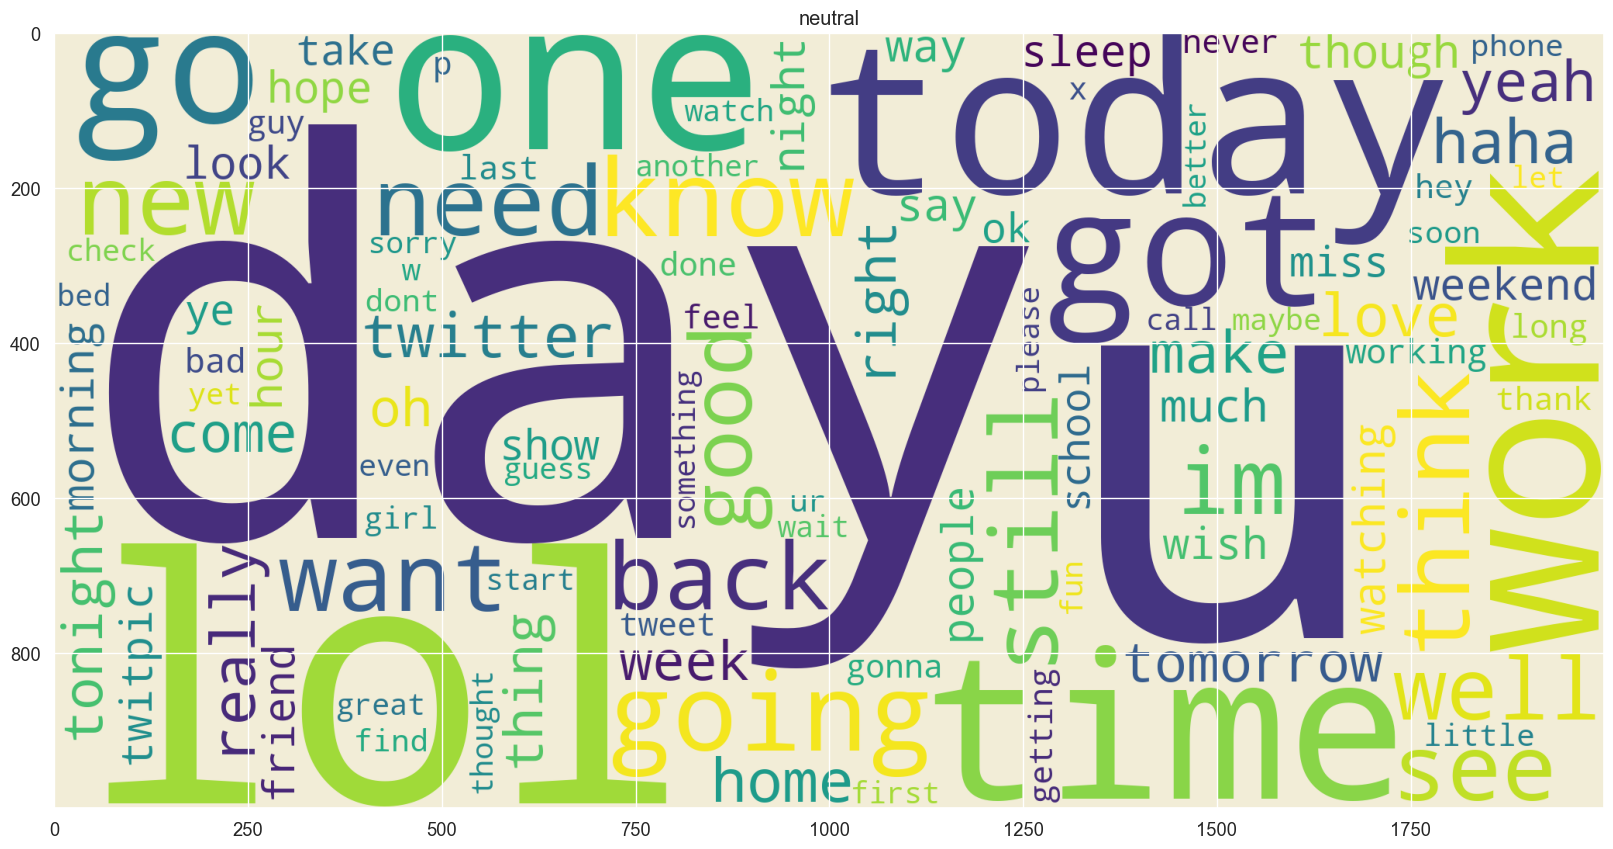

In [143]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(neutral_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("neutral")
plt.show()

# Feature Engineering


TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a numerical representation used in natural language processing and information retrieval to evaluate the importance of words in a document within a collection of documents (corpus). TF-IDF is particularly useful for feature engineering in text analysis tasks like text classification, sentiment analysis, and information retrieval.

Here's how TF-IDF works:

1.Term Frequency (TF): This measures how often a word appears in a specific document. It's calculated as the ratio of the number of times a word (term) appears in the document to the total number of words in that document. The idea is that words appearing frequently within a document are likely to be important to the document's content.

TF = (Number of times the term appears in the document) / (Total number of words in the document)

2.Inverse Document Frequency (IDF): This measures the rarity of a word across all documents in the corpus. Words that appear in many documents are considered less informative, while words that appear in fewer documents are given higher weight. IDF is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

IDF = log((Total number of documents) / (Number of documents containing the term))

3.TF-IDF: The TF-IDF score for a term in a specific document combines both the term's frequency in that document (TF) and its rarity across all documents (IDF). The higher the TF-IDF score, the more important the term is to the document's content.

TF-IDF = TF * IDF

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vector = tfidf.fit_transform(data_cleaned['text'])
y = data_cleaned['sentiment']

vector

<27480x22535 sparse matrix of type '<class 'numpy.float64'>'
	with 188511 stored elements in Compressed Sparse Row format>

In [145]:
data_cleaned['text']

0                                          responded going
1                                  sooo sad miss san diego
2                                             bos bullying
3                                    interview leave alone
4                           son put release already bought
                               ...                        
27475    wish could come see u denver husband lost job ...
27476    wondered rake client made clear net force devs...
27477    yay good enjoy break probably need hectic week...
27478                                                worth
27479                     flirting going atg smile yay hug
Name: text, Length: 27480, dtype: object

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vector, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify = y)

# SVC Model

In [147]:
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,recall_score,precision_score,f1_score
from sklearn.linear_model import LogisticRegression

In [148]:
def metrics(y_train,y_train_pred,y_test,y_test_pred):
    print("training accuracy = ",round(accuracy_score(y_train,y_train_pred),2)*100)
#     ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred,normalize = 'all')
    print(classification_report(y_train,y_train_pred))
    plt.show()

    print("testing accuracy = ",round(accuracy_score(y_test,y_test_pred),2)*100)
#     ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred,normalize = 'all')
    print(classification_report(y_test,y_test_pred))
    plt.show()

# Train

In [149]:
svc = SVC(kernel='linear',random_state=42)
svc.fit(X_train,y_train)
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

## Evaluation

In [150]:
metrics(y_train,y_train_pred,y_test,y_test_pred)

training accuracy =  84.0
              precision    recall  f1-score   support

    negative       0.89      0.77      0.82      6225
     neutral       0.78      0.89      0.83      8894
    positive       0.88      0.83      0.86      6865

    accuracy                           0.84     21984
   macro avg       0.85      0.83      0.84     21984
weighted avg       0.84      0.84      0.84     21984

testing accuracy =  70.0
              precision    recall  f1-score   support

    negative       0.73      0.60      0.66      1556
     neutral       0.63      0.77      0.69      2223
    positive       0.80      0.70      0.75      1717

    accuracy                           0.70      5496
   macro avg       0.72      0.69      0.70      5496
weighted avg       0.71      0.70      0.70      5496



In [151]:
print('Accuracy :',accuracy_score(y_test,y_test_pred))
print('Precision :',precision_score(y_test,y_test_pred,average='macro'))
print('Recall :',recall_score(y_test,y_test_pred,average='macro'))
print('f1_score :',f1_score(y_test,y_test_pred,average='macro'))

Accuracy : 0.6999636098981077
Precision : 0.7207473511832859
Recall : 0.6897696495605246
f1_score : 0.699473708050813


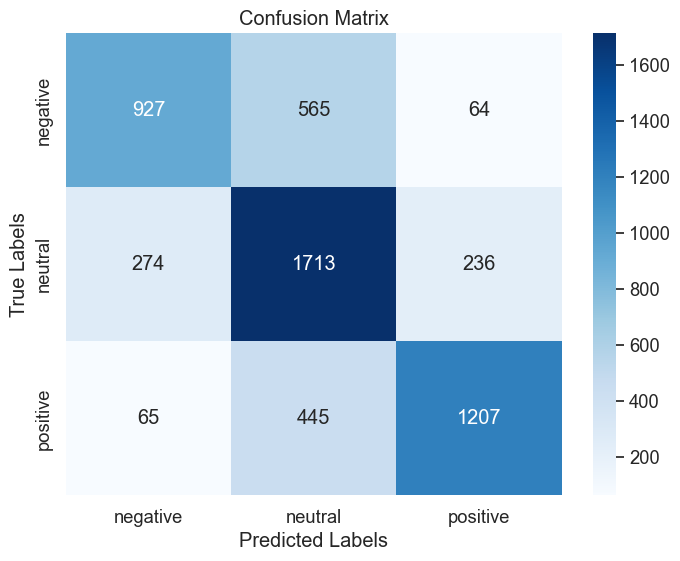

In [152]:

labels = ['negative', 'neutral', 'positive']

cm = confusion_matrix(y_test, y_test_pred, labels=labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Deployment

In [153]:
new_texts = [
    "This movie was fantastic! I loved every moment of it.",
    "I'm really disappointed with the product quality.",
    "The weather is nice today.",
    "I'm not sure how I feel about this.",
]

# Preprocess the new texts similar to what you did before
new_texts_cleaned = []

for text in new_texts:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    new_texts_cleaned.append(text1)

# Transform the cleaned new texts using the same TF-IDF vectorizer
new_texts_tfidf = tfidf.transform(new_texts_cleaned)

# Predict sentiments for the new texts
predicted_sentiments = svc.predict(new_texts_tfidf)

# Print the predicted sentiments
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 40)


Text: This movie was fantastic! I loved every moment of it.
Predicted Sentiment: positive
----------------------------------------
Text: I'm really disappointed with the product quality.
Predicted Sentiment: negative
----------------------------------------
Text: The weather is nice today.
Predicted Sentiment: positive
----------------------------------------
Text: I'm not sure how I feel about this.
Predicted Sentiment: negative
----------------------------------------


## LogisticsRegression Model

In [154]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

## Evaluation

In [155]:
metrics(y_train,y_train_pred,y_test,y_test_pred)

training accuracy =  82.0
              precision    recall  f1-score   support

    negative       0.87      0.74      0.80      6225
     neutral       0.76      0.88      0.81      8894
    positive       0.87      0.81      0.84      6865

    accuracy                           0.82     21984
   macro avg       0.83      0.81      0.82     21984
weighted avg       0.83      0.82      0.82     21984

testing accuracy =  69.0
              precision    recall  f1-score   support

    negative       0.73      0.59      0.65      1556
     neutral       0.61      0.76      0.68      2223
    positive       0.79      0.67      0.72      1717

    accuracy                           0.69      5496
   macro avg       0.71      0.67      0.68      5496
weighted avg       0.70      0.69      0.69      5496



In [156]:
print('Accuracy :',accuracy_score(y_test,y_test_pred))
print('Precision :',precision_score(y_test,y_test_pred,average='macro'))
print('Recall :',recall_score(y_test,y_test_pred,average='macro'))
print('f1_score :',f1_score(y_test,y_test_pred,average='macro'))

Accuracy : 0.6850436681222707
Precision : 0.7088109803656003
Recall : 0.674123562931174
f1_score : 0.6846028899579514


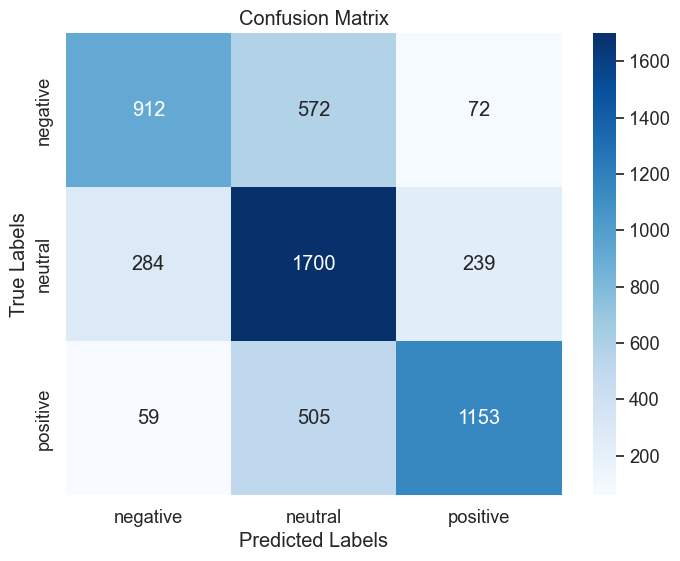

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


labels = ['negative', 'neutral', 'positive']

cm = confusion_matrix(y_test, y_test_pred, labels=labels)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for labels
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Deployment

In [158]:
example_texts = [
    "I loved the movie! The acting was fantastic.",
    "This product is terrible. I'm very disappointed.",
    "The weather today is neither good nor bad."
]

# Preprocess the new texts similar to what you did before
new_texts_cleaned = []

for text in new_texts:
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
    text = re.sub("(\\d|\\W)+", " ", text)
    text = text.split()
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
    text1 = " ".join(text)
    new_texts_cleaned.append(text1)

# Transform the cleaned new texts using the same TF-IDF vectorizer
new_texts_tfidf = tfidf.transform(new_texts_cleaned)

# Predict sentiments for the new texts
predicted_sentiments = lr.predict(new_texts_tfidf)

# Print the predicted sentiments
for text, sentiment in zip(new_texts, predicted_sentiments):
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-" * 40)



Text: This movie was fantastic! I loved every moment of it.
Predicted Sentiment: positive
----------------------------------------
Text: I'm really disappointed with the product quality.
Predicted Sentiment: negative
----------------------------------------
Text: The weather is nice today.
Predicted Sentiment: positive
----------------------------------------
Text: I'm not sure how I feel about this.
Predicted Sentiment: negative
----------------------------------------


## Transformers model

In [43]:
# pip install transformers torch

In [104]:
import torch
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
from tqdm import tqdm


X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Tokenize and encode the text data
X_train_encodings = tokenizer(list(X_train), truncation=True, padding=True, max_length=128)
X_test_encodings = tokenizer(list(X_test), truncation=True, padding=True, max_length=128)

# Convert data to PyTorch tensors
X_train_input_ids = torch.tensor(X_train_encodings['input_ids'])
X_train_attention_mask = torch.tensor(X_train_encodings['attention_mask'])
y_train = np.array([{'negative': 0, 'neutral': 1, 'positive': 2}[label] for label in y_train])

X_test_input_ids = torch.tensor(X_test_encodings['input_ids'])
X_test_attention_mask = torch.tensor(X_test_encodings['attention_mask'])
y_test = np.array([{'negative': 0, 'neutral': 1, 'positive': 2}[label] for label in y_test])

# Convert labels to PyTorch tensors with the correct data type
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader for train and test sets
train_data = TensorDataset(X_train_input_ids, X_train_attention_mask, y_train)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)  # Adjust batch size here

test_data = TensorDataset(X_test_input_ids, X_test_attention_mask, y_test)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)   # Adjust batch size here

# Set up optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Train the model
model.train()
for epoch in range(1):
    for batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluate the model
model.eval()
y_pred = []
with torch.no_grad():
    for batch in tqdm(test_dataloader):
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        predictions = np.argmax(logits.detach().numpy(), axis=1)
        y_pred.extend(predictions)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(cm)

print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('f1_score:', f1_score(y_test, y_pred, average='macro'))


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Accuracy: 0.7929403202328966
Confusion Matrix:
[[1211  320   41]
 [ 266 1734  236]
 [  24  251 1413]]
Precision: 0.7983892671699667
Recall: 0.7943111640213729
f1_score: 0.7961510099353556


In [105]:
output_dir = "model_transformers"

# Save the model and tokenizer
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

print("Model and tokenizer saved to:", output_dir)

Model and tokenizer saved to: model_transformers


## Deployment

In [106]:

import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Example texts
example_texts = [
    "I loved the movie! The acting was fantastic.",
    "This product is terrible. I'm very disappointed.",
    "The weather today is neither good nor bad."
]

# Tokenize and encode the example texts
example_encodings = tokenizer(list(example_texts), truncation=True, padding=True, max_length=128)
X_example_input_ids = torch.tensor(example_encodings['input_ids'])
X_example_attention_mask = torch.tensor(example_encodings['attention_mask'])

# Set the model to evaluation mode
model.eval()

# Make predictions
with torch.no_grad():
    outputs = model(X_example_input_ids, attention_mask=X_example_attention_mask)
    logits = outputs.logits
    predictions = np.argmax(logits.numpy(), axis=1)

sentiment_labels = ["Negative", "Neutral", "Positive"]

# Print predicted sentiments for each example text
for text, label_index in zip(example_texts, predictions):
    predicted_sentiment = sentiment_labels[label_index]
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")


Text: I loved the movie! The acting was fantastic.
Predicted Sentiment: Positive

Text: This product is terrible. I'm very disappointed.
Predicted Sentiment: Negative

Text: The weather today is neither good nor bad.
Predicted Sentiment: Neutral



## RNN model

In [159]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.utils import to_categorical


X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad the text data
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=100, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=100, padding='post', truncating='post')

# Convert sentiment labels to categorical format
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train = np.array([label_mapping[label] for label in y_train])
y_test = np.array([label_mapping[label] for label in y_test])

y_train_categorical = to_categorical(y_train, num_classes=3)
y_test_categorical = to_categorical(y_test, num_classes=3)

# Create the LSTM model
model_LSTM = Sequential([
    Embedding(5000, 32, input_length=100),
    LSTM(64),
    Dense(3, activation='softmax')
])

model_LSTM.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_LSTM.fit(X_train_pad, y_train_categorical, epochs=20, validation_data=(X_test_pad, y_test_categorical))




Epoch 1/20
687/687 [==============================] - 30s 40ms/step - loss: 1.0882 - accuracy: 0.4038 - val_loss: 1.0867 - val_accuracy: 0.4068
Epoch 2/20
687/687 [==============================] - 28s 41ms/step - loss: 1.0874 - accuracy: 0.4040 - val_loss: 1.0871 - val_accuracy: 0.4068
Epoch 3/20
687/687 [==============================] - 28s 41ms/step - loss: 1.0876 - accuracy: 0.4040 - val_loss: 1.0865 - val_accuracy: 0.4068
Epoch 4/20
687/687 [==============================] - 28s 41ms/step - loss: 1.0871 - accuracy: 0.4040 - val_loss: 1.0873 - val_accuracy: 0.4068
Epoch 5/20
687/687 [==============================] - 29s 42ms/step - loss: 1.0871 - accuracy: 0.4040 - val_loss: 1.0873 - val_accuracy: 0.4068
Epoch 6/20
687/687 [==============================] - 29s 42ms/step - loss: 1.0870 - accuracy: 0.4040 - val_loss: 1.0867 - val_accuracy: 0.4068
Epoch 7/20
687/687 [==============================] - 31s 45ms/step - loss: 1.0871 - accuracy: 0.4040 - val_loss: 1.0868 - val_accuracy:

## Evaluation

In [160]:
# Evaluate the model
loss, accuracy = model_LSTM.evaluate(X_test_pad, y_test_categorical)
print("Accuracy:", accuracy)



172/172 [==============================] - 3s 15ms/step - loss: 1.0866 - accuracy: 0.4068
Accuracy: 0.40684133768081665


In [161]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred_categorical = model_LSTM.predict(X_test_pad)
y_pred = [np.argmax(pred) for pred in y_pred_categorical]

# Convert categorical predictions back to sentiment labels
y_pred_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(pred)] for pred in y_pred]

# Convert true labels to sentiment labels
y_true_labels = [list(label_mapping.keys())[list(label_mapping.values()).index(true_label)] for true_label in y_test]

# Calculate metrics
accuracy = accuracy_score(y_true_labels, y_pred_labels)
precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


172/172 [==============================] - 3s 15ms/step
Accuracy: 0.40684133915574966
Precision: 0.16551987524604372
Recall: 0.40684133915574966
F1-Score: 0.23530709631460323


## Deployment

In [162]:
# Deployment
example_texts = [
    "I loved the movie! The acting was fantastic.",
    "This product is terrible. I'm very disappointed.",
    "The weather today is neither good nor bad."
]

# Tokenize and pad the example texts
example_texts_seq = tokenizer.texts_to_sequences(example_texts)
example_texts_pad = pad_sequences(example_texts_seq, maxlen=100, padding='post', truncating='post')

# Make predictions
predictions = model_LSTM.predict(example_texts_pad)

# Convert predictions to sentiment labels
predicted_labels = np.argmax(predictions, axis=1)
sentiment_labels = ["Negative", "Neutral", "Positive"]

# Print predicted sentiments for each example text
for text, label_index in zip(example_texts, predicted_labels):
    predicted_sentiment = sentiment_labels[label_index]
    print(f"Text: {text}")
    print(f"Predicted Sentiment: {predicted_sentiment}\n")


1/1 [==============================] - 0s 21ms/step
Text: I loved the movie! The acting was fantastic.
Predicted Sentiment: Neutral

Text: This product is terrible. I'm very disappointed.
Predicted Sentiment: Neutral

Text: The weather today is neither good nor bad.
Predicted Sentiment: Neutral



In [52]:
# Save the trained LSTM model
model_path = "model_LSTM"
model_LSTM.save(model_path)

print("LSTM model saved to:", model_path)


INFO:tensorflow:Assets written to: model_LSTM\assets


INFO:tensorflow:Assets written to: model_LSTM\assets


LSTM model saved to: model_LSTM


## Results

In [163]:

data = {
    'Model': ['Logistic Regression', 'Support Vector Machine', 'BERT(transformers)', 'LSTM(RNN)'],
    'Accuracy': [0.68, 0.69, 0.792, 0.40],
    'Precision': [0.70, 0.72, 0.798, 0.16],
    'Recall': [0.67, 0.68, 0.794,0.40],
    'F1_Score': [0.68, 0.69, 0.799,0.23]
}

df = pd.DataFrame(data)

df


,Model,Accuracy,Precision,Recall,F1_Score
0,Logistic Regression,0.680,0.700,0.670,0.680
1,Support Vector Machine,0.690,0.720,0.680,0.690
2,BERT(transformers),0.792,0.798,0.794,0.799
3,LSTM(RNN),0.400,0.160,0.400,0.230


## Challenges and Solutions:

# 1.Imbalanced Data: 
If the dataset has a significant class imbalance (e.g., more positive than negative samples), the model might become biased towards the majority class. Solution: Implement techniques like oversampling, undersampling, or using different evaluation metrics that account for class imbalance.

# 2.Sarcasm and Irony: 
Sentiments conveyed through sarcasm or irony can be challenging for models to accurately interpret. Solution: Incorporate contextual information, advanced sentiment analysis models, or sentiment lexicons that capture nuanced language.

# 3. Contextual Understanding:
Some words might have different sentiments based on context. For instance, "bad" can refer to product quality or imply a negative experience. Solution: Utilize models like BERT or other contextual embeddings that capture word meaning in context.

# 4.Domain Specificity:
Sentiment expressions can vary across domains, and models trained on one domain may not perform well on another. Solution: Fine-tune or train models on domain-specific data to capture domain-specific sentiment patterns.

# 5.Data Noise: 
Noisy text data with typos, slang, and grammatical errors can affect model performance. Solution: Implement robust text preprocessing techniques, possibly using spell-checkers and language correction tool

## Suggestions for Future Improvements or Extensions:

# 1.Aspect-based Sentiment Analysis:
Instead of treating the entire text as a single sentiment, analyze sentiment towards specific aspects/entities mentioned in the text. This provides more detailed insights.

# 2.Multilingual Sentiment Analysis: 
Extend the project to handle sentiment analysis in multiple languages, which can be valuable for global applications.

# 3.Emotion Analysis: 
Go beyond binary sentiment classification and explore detecting specific emotions like joy, anger, sadness, etc.

# 4.Real-time Sentiment Monitoring:
Develop a system that can analyze and visualize real-time sentiment from social media or user-generated content.

# 5.Ensemble Models:
Combine multiple sentiment analysis models (e.g., TF-IDF, word embeddings, BERT) using ensemble techniques to improve overall accuracy.

# 6.Explainable AI: 
Investigate methods to make the model's predictions more interpretable, such as generating explanations for why certain sentiments were predicted.

# 7.Fine-grained Sentiment Analysis: 
Instead of just positive/negative sentiment, consider fine-grained sentiment levels like strongly positive, mildly positive, neutral, mildly negative, strongly negative.

# 8. User Interface: 
Create a user-friendly interface or application where users can input text and get sentiment predictions along with visualization of sentiment trends.

# 9.Active Learning: 
Implement active learning strategies to iteratively select and label the most informative samples for model improvement, reducing the labeling effort.

# 10.Continuous Learning: 
Set up a pipeline for continuous learning, allowing the model to adapt and improve over time as new labeled data becomes available.

